In [2]:
file_path = 'C:/Users/Andre/OneDrive/Documents/GitHub/amz_uk_price_prediction_dataset.csv'
data = pd.read_csv(file_path)
print(data)

             uid        asin  \
0              1  B09B96TG33   
1              2  B01HTH3C8S   
2              3  B09B8YWXDF   
3              4  B09B8T5VGV   
4              5  B09WX6QD65   
...          ...         ...   
2443646  2828589  B0CHSD7P2Q   
2443647  2828590  B0B7B8FNBQ   
2443648  2828591  B0BD5FL5FB   
2443649  2828592  B008OYLL4I   
2443650  2828593  B08P3W9B3T   

                                                     title  stars  reviews  \
0        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
1        Anker Soundcore mini, Super-Portable Bluetooth...    4.7    98099   
2        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
3        Echo Dot with clock (5th generation, 2022 rele...    4.7     7205   
4        Introducing Echo Pop | Full sound compact Wi-F...    4.6     1881   
...                                                    ...    ...      ...   
2443646  Motorbike Armour, Motorbike Clothing, Cycling ...    0.0    

In [3]:
data.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

Top 5 Categorías de Producto
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: category, dtype: int64


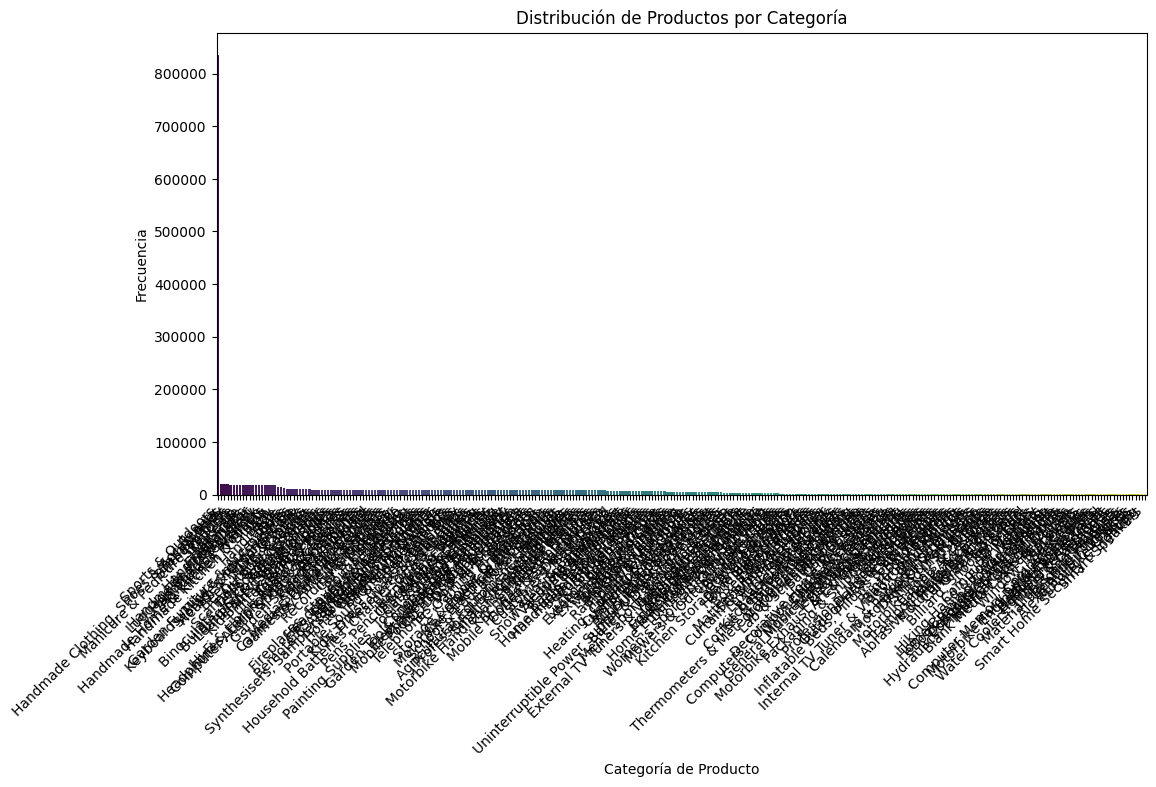

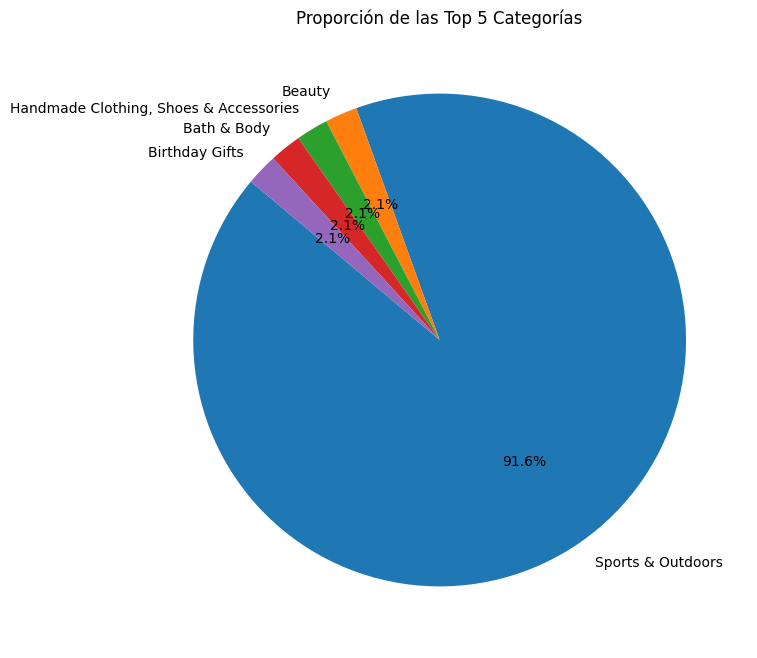


Medidas de Centralidad para Precios
Media: 89.24380943923663, Mediana: 19.09, Moda: 9.99

Medidas de Dispersión para Precios
Varianza: 119445.48532254907, Desviación Estándar: 345.60886175349884
Rango: 100000.0, Rango Intercuartílico (IQR): 36.0


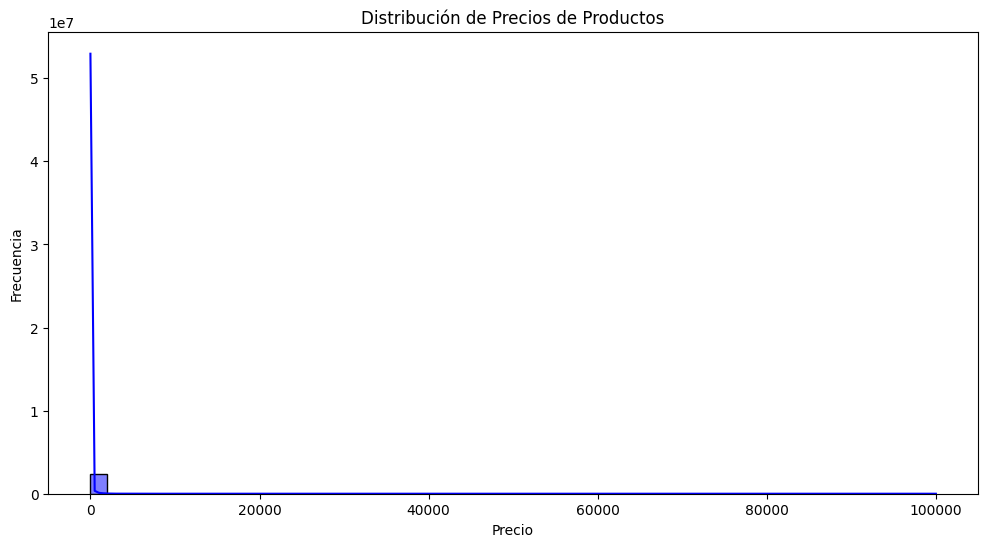

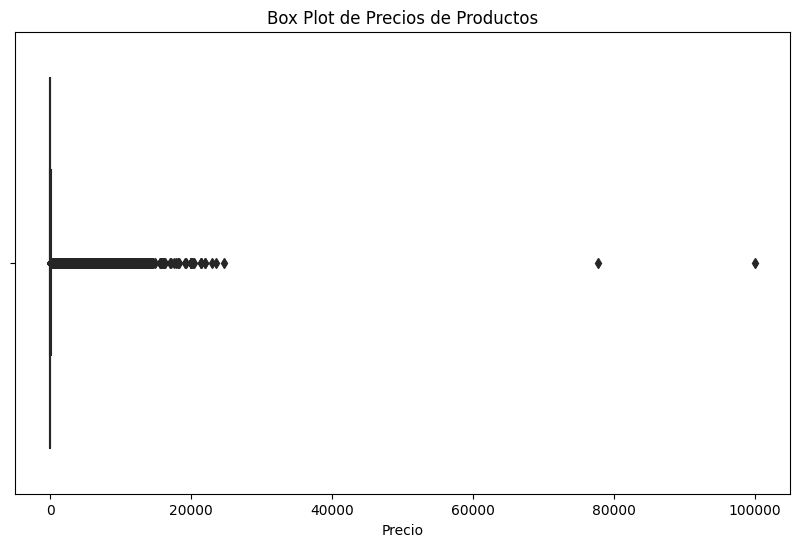


Medidas de Centralidad para Calificaciones
Media: 2.152836472966065, Mediana: 0.0, Moda: 0.0

Medidas de Dispersión para Calificaciones
Varianza: 4.817434029796862, Desviación Estándar: 2.1948653785134207
Rango Intercuartílico (IQR): 4.4

Forma de la Distribución de Calificaciones
Asimetría (Skewness): 0.08120730776283354, Curtosis (Kurtosis): -1.926004642549839


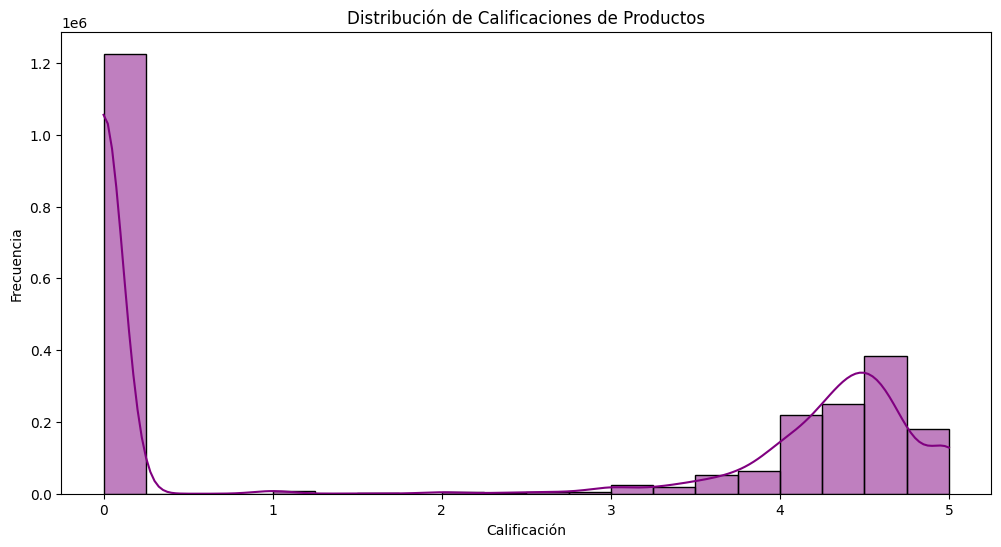

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# --- Parte 1: Categorías de Producto ---
# Frecuencia por categoría
category_frequency = data['category'].value_counts()

# Top 5 Categorías más listadas
top_5_categories = category_frequency.head(5)

# Mostrar la tabla
print("Top 5 Categorías de Producto")
print(top_5_categories)

# Gráfico de Barras
plt.figure(figsize=(12, 6))
sns.barplot(x=category_frequency.index, y=category_frequency.values, palette="viridis")
plt.title("Distribución de Productos por Categoría")
plt.xlabel("Categoría de Producto")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha="right")
plt.show()

# Gráfico de Pastel para las Top 5 Categorías
plt.figure(figsize=(8, 8))
top_5_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=False)
plt.title("Proporción de las Top 5 Categorías")
plt.ylabel('')  # Quitar etiqueta del eje Y
plt.show()

# --- Parte 2: Análisis de Precios de Productos ---
# Medidas de Centralidad
mean_price = data['price'].mean()
median_price = data['price'].median()
mode_price = data['price'].mode().iloc[0]

print("\nMedidas de Centralidad para Precios")
print(f"Media: {mean_price}, Mediana: {median_price}, Moda: {mode_price}")

# Medidas de Dispersión
variance_price = data['price'].var()
std_dev_price = data['price'].std()
range_price = data['price'].max() - data['price'].min()
iqr_price = data['price'].quantile(0.75) - data['price'].quantile(0.25)

print("\nMedidas de Dispersión para Precios")
print(f"Varianza: {variance_price}, Desviación Estándar: {std_dev_price}")
print(f"Rango: {range_price}, Rango Intercuartílico (IQR): {iqr_price}")

# Histograma de Precios
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title("Distribución de Precios de Productos")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# Box Plot para Precios
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'], color='green')
plt.title("Box Plot de Precios de Productos")
plt.xlabel("Precio")
plt.show()

# --- Parte 3: Análisis de Calificaciones ---
# Medidas de Centralidad
mean_rating = data['stars'].mean()
median_rating = data['stars'].median()
mode_rating = data['stars'].mode().iloc[0]

print("\nMedidas de Centralidad para Calificaciones")
print(f"Media: {mean_rating}, Mediana: {median_rating}, Moda: {mode_rating}")

# Medidas de Dispersión
variance_rating = data['stars'].var()
std_dev_rating = data['stars'].std()
iqr_rating = data['stars'].quantile(0.75) - data['stars'].quantile(0.25)

print("\nMedidas de Dispersión para Calificaciones")
print(f"Varianza: {variance_rating}, Desviación Estándar: {std_dev_rating}")
print(f"Rango Intercuartílico (IQR): {iqr_rating}")

# Forma de la Distribución
skewness_rating = skew(data['stars'].dropna())
kurtosis_rating = kurtosis(data['stars'].dropna())

print("\nForma de la Distribución de Calificaciones")
print(f"Asimetría (Skewness): {skewness_rating}, Curtosis (Kurtosis): {kurtosis_rating}")

# Histograma para Calificaciones
plt.figure(figsize=(12, 6))
sns.histplot(data['stars'], bins=20, kde=True, color='purple')
plt.title("Distribución de Calificaciones de Productos")
plt.xlabel("Calificación")
plt.ylabel("Frecuencia")
plt.show()
